<a href="https://colab.research.google.com/github/RIZKYANGKATA/MACHLEARN/blob/main/KUIS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kuis 2 Machine Learning**

*Program OCR untuk mengextract text dari data ktp, dengan input foto ktp dan output text*

*1. Instalasi & Import Library*

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,837 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

*Load Data*


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
IMG_DIR = '/content/drive/MyDrive/ML/'

*Menampilkan Gambar Asli*

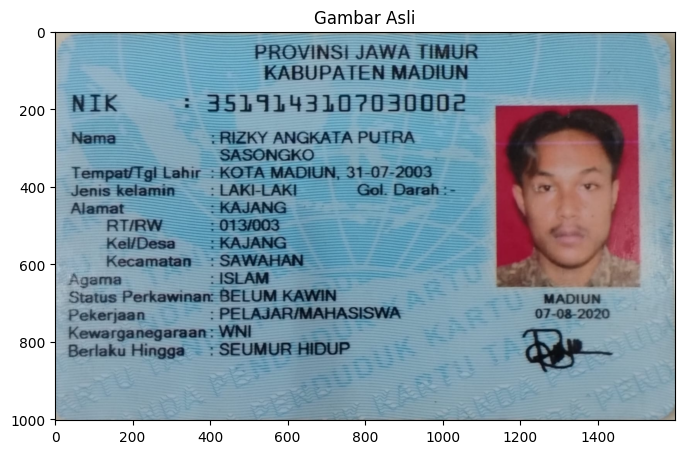

In [48]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'KTP 1.jpeg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)
plt.title('Gambar Asli')
plt.show()

*2. Deteksi Orientasi dan Skrip*

*Mendeteksi Sudut Rotasi dan Jenis Skrip dengan Tesseract*

In [49]:
# Mendeteksi orientasi teks menggunakan Tesseract
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
osd_data = pytesseract.image_to_osd(gray_image)

# Menganalisis data skrip untuk mengekstrak orientasi dan jenis skrip
script_lines = osd_data.split('\n')
angle_line = [line for line in script_lines if 'Rotate' in line][0]
angle = int(angle_line.split(':')[-1].strip())

script_line = [line for line in script_lines if 'Script' in line][0]
script_type = script_line.split(':')[-1].strip()

# Menampilkan hasil orientasi dan jenis skrip
print(f'Sudut Rotasi (angle): {angle} derajat')
print(f'Jenis Skrip (script): {script_type}')

Sudut Rotasi (angle): 0 derajat
Jenis Skrip (script): Cyrillic


*Merotasi Gambar dan Menampilkan Gambar Hasil Rotasi*

In [31]:
# # Membaca gambar dari direktori
# image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# # Rotasi gambar 90 derajat
# rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# # Menampilkan gambar asli
# plt.figure(figsize=(8, 6))
# plt.imshow(rotated_image)
# plt.title(f'Gambar Setelah Rotasi {angle} derajat' )
# plt.show()

*Bounding Box - Level Karakter*

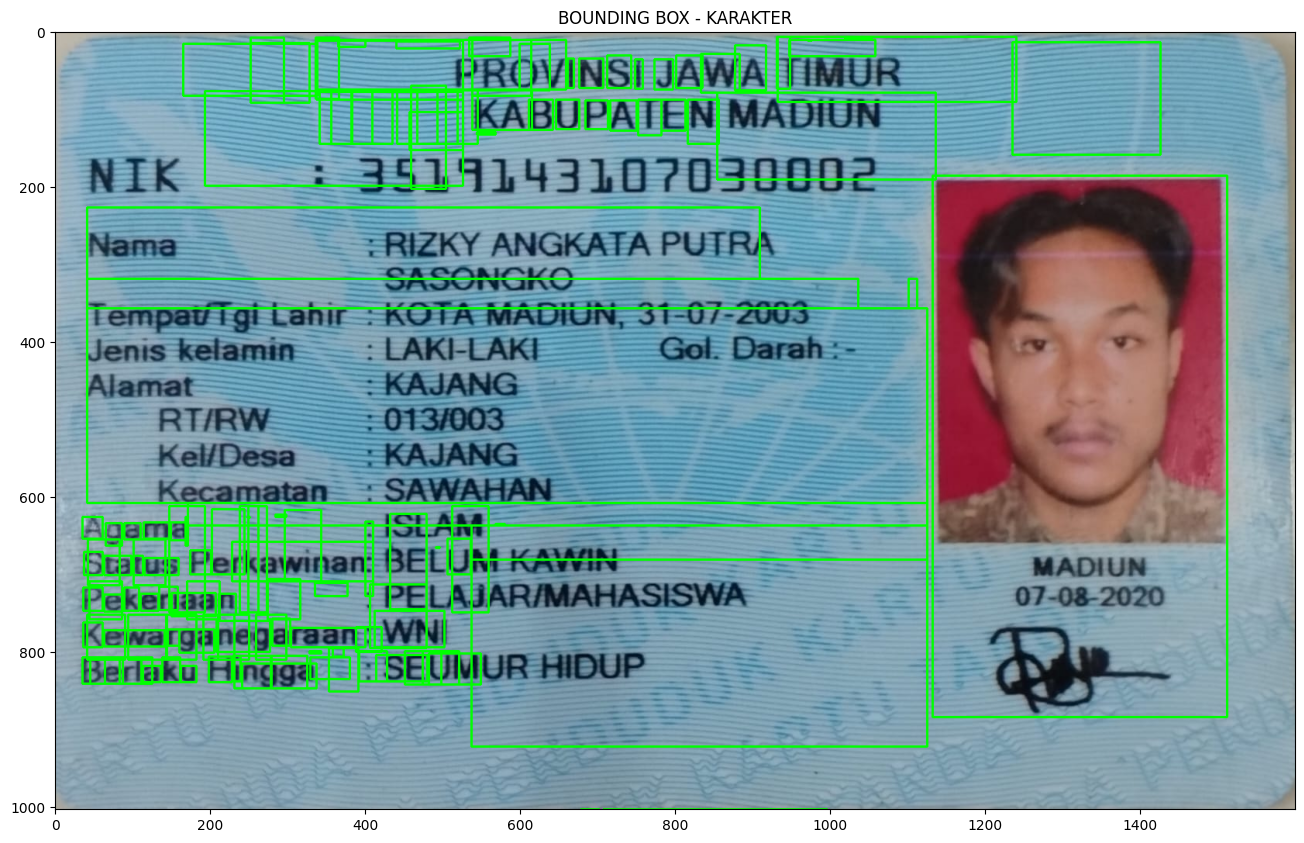

In [50]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'KTP 1.jpeg')

# Rotasi gambar 90 derajat
# rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('BOUNDING BOX - KARAKTER')
plt.show()

*Bounding Box - Level Kata*

In [51]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'KTP 1.jpeg')

# Rotasi gambar 90 derajat
# rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


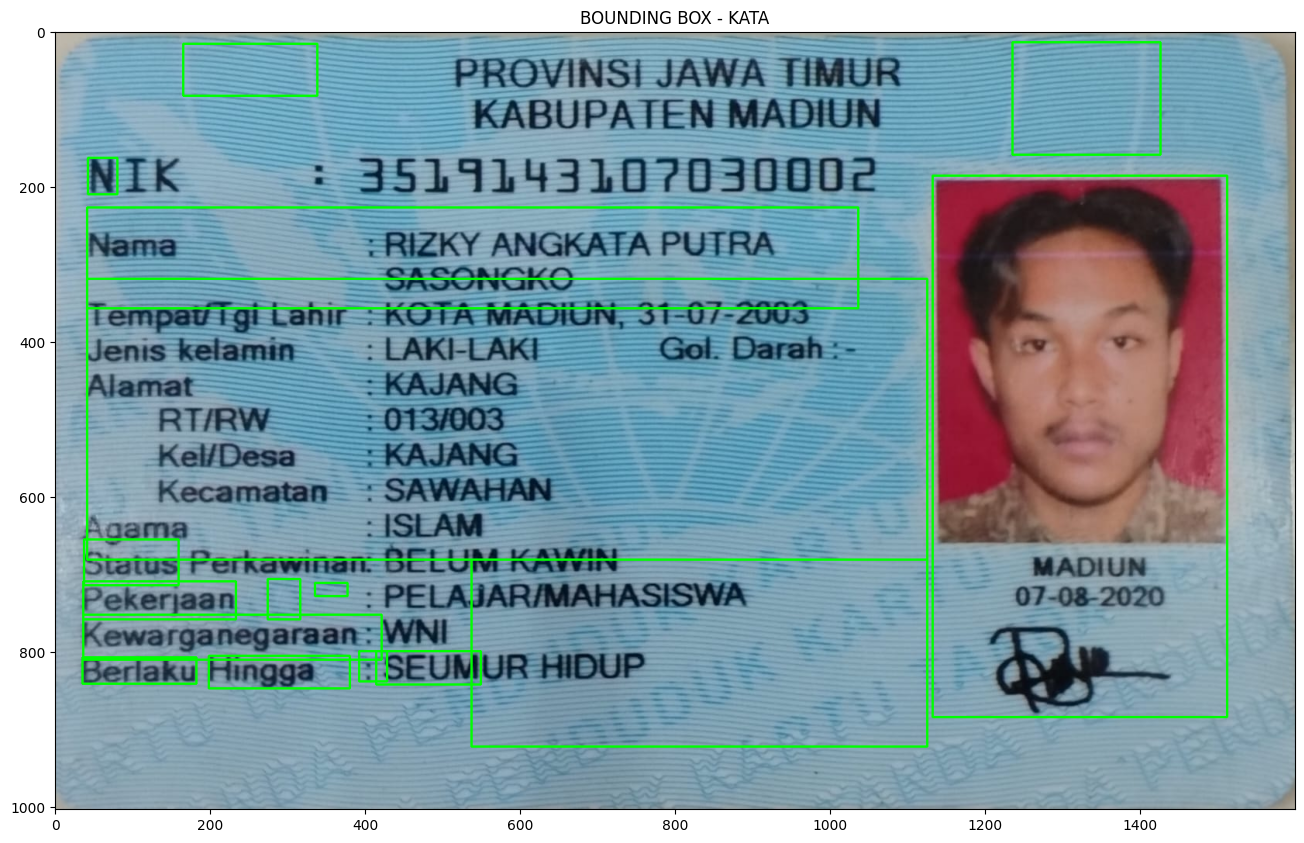

In [52]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('BOUNDING BOX - KATA')
plt.show()

**Text Template Matching - Pola Regex**

*Mencari kata terakhir pada sebuah kalimat*


In [36]:
# # Membaca gambar dari direktori
# image = cv2.imread(IMG_DIR + 'KTP.jpeg')

# # Rotasi gambar 90 derajat
# rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# # Pola untuk mencocokkan kalimat terakhir yang diakhiri dengan tanda "."
# sentence_pattern = '.*\.$'

In [37]:
# n_boxes = len(d['text'])
# for i in range(n_boxes):
#     # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
#     if int(d['conf'][i]) > 60:
#         # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
#         if re.match(sentence_pattern, d['text'][i]):
#             # Mendapatkan koordinat dan ukuran kotak kata
#             (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#             # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
#             image = cv2.rectangle(rotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # Memisahkan channel warna untuk mengonversi dari BGR ke RGB
# b, g, r = cv2.split(rotated_image)
# rgb_img = cv2.merge([r, g, b])

# # Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
# plt.figure(figsize=(16, 12))
# plt.imshow(rgb_img)
# plt.title('KATA TERAKHIR PADA KALIMAT')
# plt.show()

*Deteksi Berbagai Bahasa - OCR*

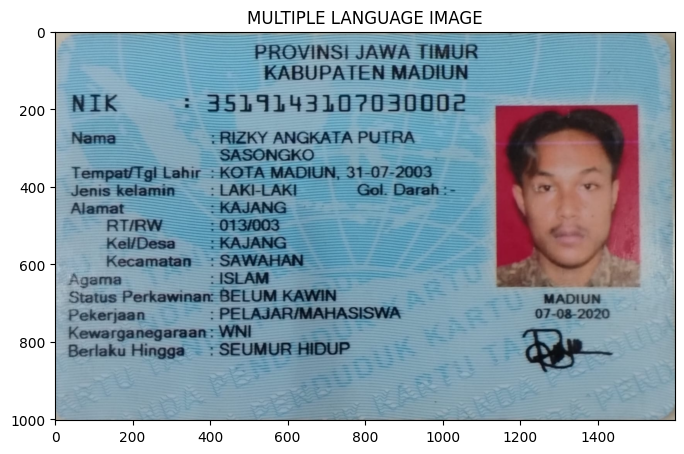

In [53]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'KTP 1.jpeg')

# Rotasi gambar 90 derajat
# rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

*Mengekstrak Teks dari Gambar dengan Tesseract OCR*

In [54]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))

_______PROVINS}JAWATIMUR
NIK = 351914310703000e —
Nome RIZKY ANGKATAPUTRA |
2 Sena __ = =
Tempat/Tgi Lahir -KOTA MADIUN, 31-07-2003 -
eee oe ee ‘a *
—————SS 6 SS 7
LSS SS
——— -
Kecamatan :SAWAHAN oe
Ageee. 2S _|_=———_—S
Status Perkawinan: BELUM KAWIN, —== MADIUN
Pekerjaan = : PELAJAR/MAHASISWA — === 07-08-2020
Kewarganegaraan: WNI ————S =
Berlaku Hingga — 1 SEUMURHIDUP — eee
= fa

